In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

# 1. Initial Data Exploration

In [2]:
# Load dataset
df_train = pd.read_csv("data/listes_training/data_100K/train_100K.csv", delimiter=' ')
df_test = pd.read_csv("data/listes_training/data_100K/test_students.csv", delimiter=' ')
image_dir = "data/crops_100K"

In [3]:
# Display basic information about the dataset
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101345 entries, 0 to 101344
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   filename       101345 non-null  object 
 1   FaceOcclusion  101341 non-null  float64
 2   gender         101345 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


,filename,FaceOcclusion,gender
0,database1/img00011271.jpg,0.019,0.999
1,database1/img00012471.jpg,0.035,1.000
2,database1/img00008127.jpg,0.127,0.001
3,database1/img00008972.jpg,0.014,0.999
4,database1/img00028187.jpg,0.346,0.982


In [4]:
df_test.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30507 entries, 0 to 30506
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  30507 non-null  object
dtypes: object(1)
memory usage: 238.5+ KB


,filename,FaceOcclusion,gender
0,database1/img00011271.jpg,0.019,0.999
1,database1/img00012471.jpg,0.035,1.000
2,database1/img00008127.jpg,0.127,0.001
3,database1/img00008972.jpg,0.014,0.999
4,database1/img00028187.jpg,0.346,0.982


In [5]:
# Remove missing values
df_train = df_train.dropna()
df_test = df_test.dropna()

# Round 1st decimal value of gender for representation
df_train['gender'] = df_train['gender'].round(1)

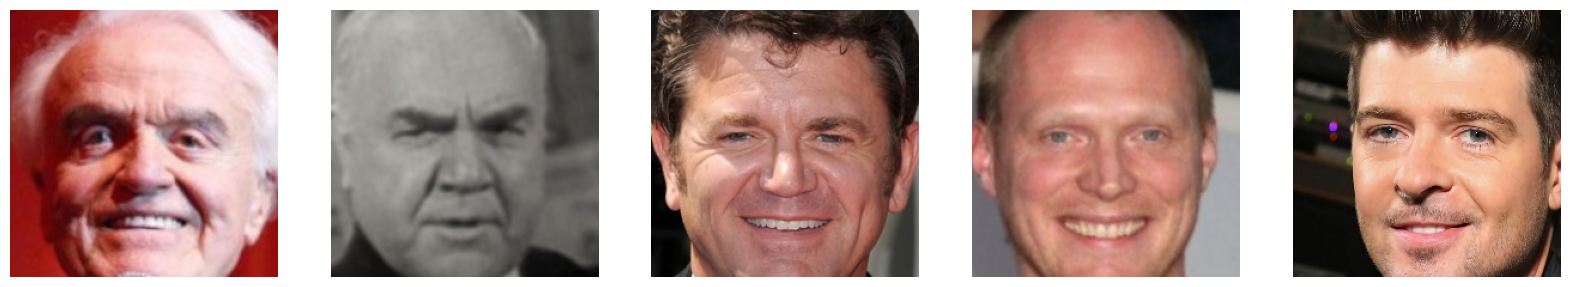

In [6]:
# Visual inspection of a few images
sample_images = df_train.sample(5)['filename']  # Assuming there's an 'image_id' column
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i, img_id in enumerate(sample_images):
    img_path = f"{image_dir}/{img_id}"  # Update the extension if different
    img = Image.open(img_path)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

# 2. Distribution analysis

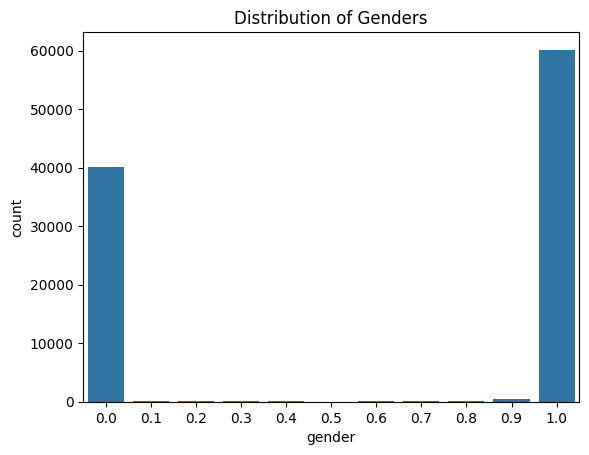

In [7]:
# Gender distribution
sns.countplot(x='gender', data=df_train)
plt.title('Distribution of Genders')
plt.show()

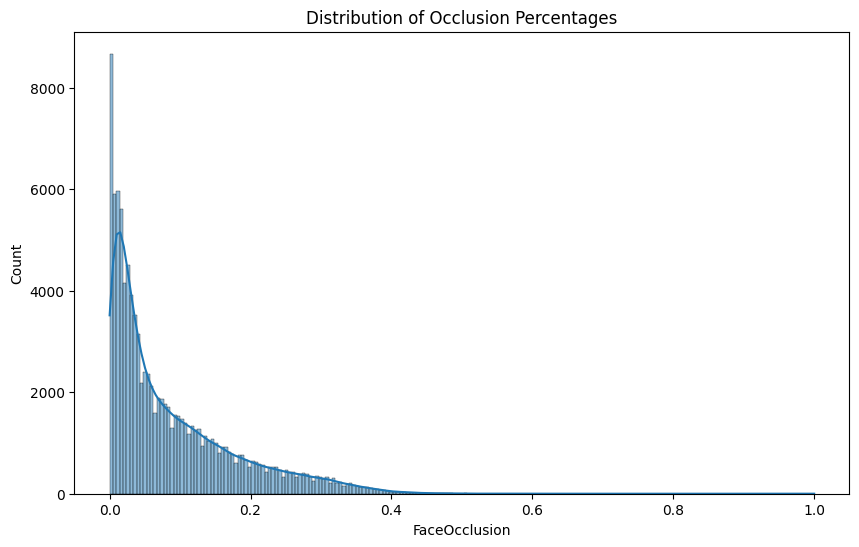

In [8]:
# Distribution of occlusion percentages
plt.figure(figsize=(10, 6))
sns.histplot(df_train['FaceOcclusion'], kde=True)
plt.title('Distribution of Occlusion Percentages')
plt.show()

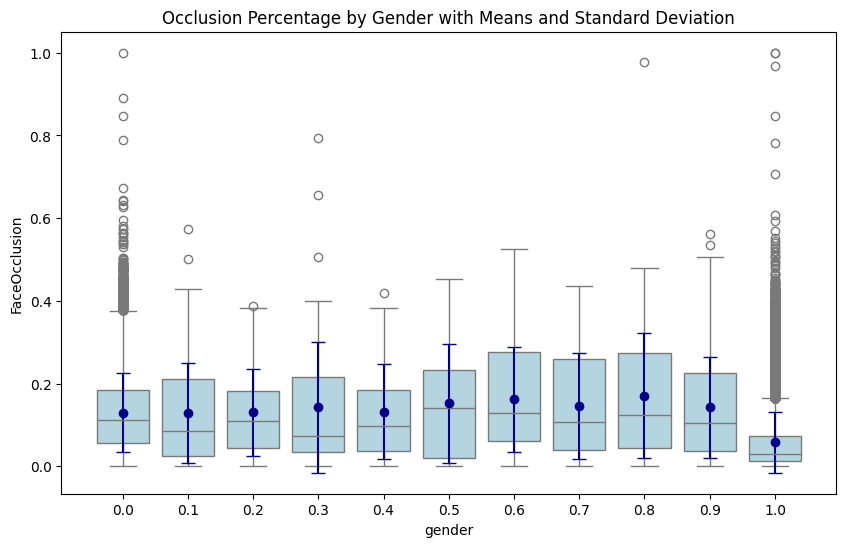

In [14]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
ax = sns.boxplot(x='gender', y='FaceOcclusion', data=df_train, color='lightblue')

# Calculate the means and standard deviations
mean_values = df_train.groupby('gender')['FaceOcclusion'].mean()
std_dev = df_train.groupby('gender')['FaceOcclusion'].std()

# Overlay mean and standard deviation bars
for i, gender in enumerate(mean_values.index):
    plt.errorbar(i, mean_values[gender], yerr=std_dev[gender], fmt='o', color='darkblue', capsize=5)

plt.title('Occlusion Percentage by Gender with Means and Standard Deviation')
plt.show()

In [19]:
# Grouping data by gender and comparing occlusion percentages
grouped_data = df_train.groupby('gender')['FaceOcclusion'].describe()
grouped_data

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0.0,40076.0,0.130098,0.094610,0.0,0.05600,0.1120,0.18400,1.000
0.1,154.0,0.128734,0.120477,0.0,0.02575,0.0865,0.21175,0.573
0.2,68.0,0.130706,0.105537,0.0,0.04450,0.1085,0.18125,0.387
0.3,63.0,0.142762,0.158236,0.0,0.03550,0.0730,0.21550,0.793
0.4,49.0,0.132143,0.114236,0.0,0.03600,0.0980,0.18500,0.420
0.5,31.0,0.152194,0.144681,0.0,0.02000,0.1420,0.23200,0.452
0.6,63.0,0.161952,0.127035,0.0,0.06200,0.1290,0.27700,0.526
0.7,83.0,0.146337,0.127482,0.0,0.03950,0.1060,0.26050,0.437
0.8,145.0,0.170841,0.151329,0.0,0.04500,0.1250,0.27300,0.977
